In [77]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

display(Markdown("# Homework 1"))

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    return r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'


# Homework 1

## Problem 1

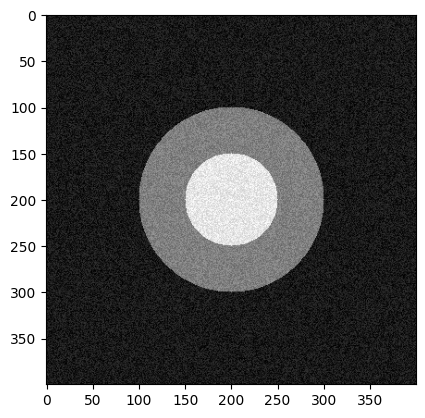

In [76]:
%matplotlib inline
display(Markdown("## Problem 1"))

#background
synth = np.ones((400, 400), dtype=np.uint8)*64
center = np.array(synth.shape[:2])//2
#outer circle
synth = cv2.circle(synth,center, 100, 128, -1)
#inner circle
synth = cv2.circle(synth,center, 50, 192, -1)
#add salt and pepper with +- 16
synth = synth + np.random.randint(-16, 16, synth.shape)
plt.imshow(synth, cmap='gray')
plt.show()

## Problem 2

<IPython.core.display.Math object>

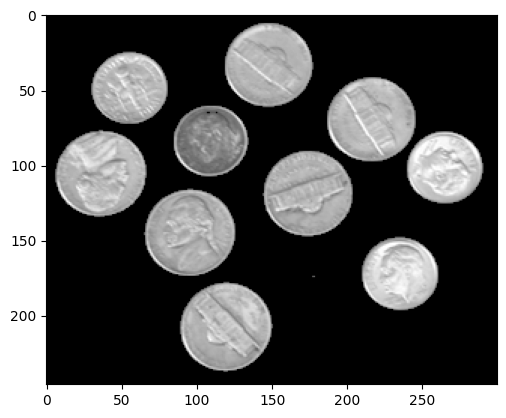

In [78]:
%matplotlib inline
display(Markdown("## Problem 2"))

coins = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
regions = (coins > 85) * coins

display(Math(f"max :{max(regions.flatten())} \quad mean :{regions.mean().astype(np.uint8)} \quad standard deviation :{regions.std().astype(np.uint8)}"))



plt.imshow(regions, cmap='gray')
plt.show()

In [132]:
display(Markdown("## Problem 3"))
#arcsine numpy output in degrees
display(Markdown(r"### a) FoV = $ 2\arctan( \frac{%s}{%s} ) = 2\arctan( \frac{%s}{%s}) = %g $" % ('Fovia \ length', '2 \cdot Focal \ length', '1.5mm', '2 \cdot 17mm', 2*np.arctan(1.5/17/2)*180/np.pi)))

h = 1.3e-6
d = 17e-3
D = 1609
H = '?'
s = r'\quad \frac{H}{D} = \frac{h}{d} \Rightarrow' 
s += r'\frac{h}{d} \cdot D'
s += r'= \frac{4 \cdot 1.3 \cdot 10^{-6}}{17 \cdot 10^{-3}} \cdot 1609 \approx %g cm' % (round(4*h*D/d *100, 1))
display(Markdown(f"### b) ${s}$"))
display(Markdown(r'assuming object is atleast 1m tall(human) with a distance of 1mi from observer $\Rightarrow$ can be viewed'))

## Problem 3

### a) FoV = $ 2\arctan( \frac{Fovia \ length}{2 \cdot Focal \ length} ) = 2\arctan( \frac{1.5mm}{2 \cdot 17mm}) = 5.05223 $

### b) $\quad \frac{H}{D} = \frac{h}{d} \Rightarrow\frac{h}{d} \cdot D= \frac{4 \cdot 1.3 \cdot 10^{-6}}{17 \cdot 10^{-3}} \cdot 1609 \approx 49.2 cm$

assuming object is atleast 1m tall(human) with a distance of 1mi from observer $\Rightarrow$ can be viewed

In [224]:
display(Markdown("## Problem 4"))
#markdown table with lenses fovs of 30, 60, 90 and resolution of 256x256, 512x512, 1024x1024 and calculate area of image recieved in 2m distance
FOVs = [30, 60, 90]
resolutions = [256, 512, 1024]
distance = 2
def fov_to_length(fov, distance, str = False):
    length = (distance)*np.tan(np.deg2rad(fov/2))*2*100
    if str:
        return f'{length:.2f}x{length:.2f}'
    return length

def pixel_per_area(resolution, fov, distance, area, str=False):
    length = fov_to_length(fov, distance)
    pcount = area * resolution / length
    if str:
        return f'{pcount**2:.0f}'
    return pcount ** 2

def accuracy(fov, distance, resolution, str=False):
    length = fov_to_length(fov, distance)
    if str:
        return f'{length / resolution:.2f}'
    return length / resolution

s = '''
|   Resolution  |   FOV     |      Area Viewed ($cm^{2}$)     |      Pixel per 10x10cm Area    |        Percision (cm per pixel)    |
|--------------:|:---------:|:---------------------:|:------------------------------:|--------------------------------:| 
'''
for resolution in resolutions:
    for fov in FOVs:
        s +=f"|{resolution}x{resolution}|{fov}|\
        {fov_to_length(fov, distance, True)}|\
        {pixel_per_area(resolution, fov, distance, 10, True)}|\
        {accuracy(fov, distance, resolution, True)}|\n"


display(Markdown(s))

display(Markdown(r"##### from the precision stated in the question size of the ball can be estimated to be 10x10 $cm^{2}$ and the maximum percision needs to be 1cm per pixel at worst."))
display(Markdown(r"##### we thereby conclude that the best resolution for the task is 256x256 with a FOV of 60 degrees which satisfies all the requirements with the table being fully visble"))



## Problem 4


|   Resolution  |   FOV     |      Area Viewed ($cm^{2}$)     |      Pixel per 10x10cm Area    |        Percision (cm per pixel)    |
|--------------:|:---------:|:---------------------:|:------------------------------:|--------------------------------:| 
|256x256|30|        107.18x107.18|        570|        0.42|
|256x256|60|        230.94x230.94|        123|        0.90|
|256x256|90|        400.00x400.00|        41|        1.56|
|512x512|30|        107.18x107.18|        2282|        0.21|
|512x512|60|        230.94x230.94|        492|        0.45|
|512x512|90|        400.00x400.00|        164|        0.78|
|1024x1024|30|        107.18x107.18|        9128|        0.10|
|1024x1024|60|        230.94x230.94|        1966|        0.23|
|1024x1024|90|        400.00x400.00|        655|        0.39|


##### from the precision stated in the question size of the ball can be estimated to be 10x10 $cm^{2}$ and the maximum percision needs to be 1cm per pixel at worst.

##### we thereby conclude that the best resolution for the task is 256x256 with a FOV of 60 degrees which satisfies all the requirements with the table being fully visble

## Problem 5

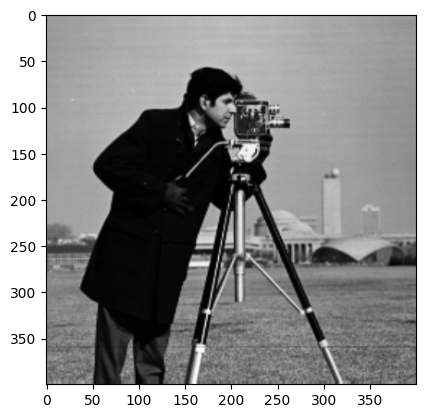

shape: (400, 400)

In [265]:
%matplotlib inline
import math
display(Markdown("## Problem 5"))

cameraman = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
# cameraman = np.identity(256, dtype=np.uint8)*255
#mute np warnings
np.seterr(divide='ignore', invalid='ignore')
#resize image to 400x400 using bilinear interpolation
def resize(image, size):
    height, width = image.shape[:2]
    new_image = np.zeros(size, dtype=np.uint8)
    for y in range(size[0]):
        for x in range(size[1]):
            x1 = math.floor(x * width / size[1])
            x2 = min(math.ceil(x * width / size[1]), width - 1)
            y1 = math.floor(y * height / size[0])
            y2 = min(math.ceil(y * height / size[0]), height - 1)
            xx = x * width / size[1]
            yy = y * height / size[0]
            # if x % 25 == 0 and y % 25 == 0 and x != 0 and y != 0:
            #     print(x,y,x1, x2, y1, y2, x * width / size[1], y * height / size[0])

            if x1 == x2:
                if y1 == y2:
                    new_image[y, x] = image[y1, x1]
                else:
                    new_image[y, x] = (image[y1, x1] * (y2 - yy) + image[y2, x1] * (yy - y1)) / (y2 - y1)
            elif y1 == y2:
                new_image[y, x] = (image[y1, x1] * (x2 - xx) + image[y1, x2] * (xx - x1)) / (x2 - x1)
            else:
                new_image[y, x] =   (image[y1, x1] * (x2 - xx) * (y2 -yy) +
                                    image[y1, x2] * (xx - x1) * (y2 - yy) +
                                    image[y2, x1] * (x2 - xx) * (yy - y1) +   
                                    image[y2, x2] * (xx - x1) * (yy - y1)) / ((x2 - x1) * (y2 - y1))  


            
    return new_image
cameraman_resized = resize(cameraman, (400, 400))
plt.imshow(cameraman_resized, cmap='gray')
plt.show()
display(Markdown(f"shape: {cameraman_resized.shape}"))
